In [1]:
#!/usr/bin/python
# updated DBR 4/2023 #

%matplotlib inline

import numpy as np
import scipy.optimize as opt
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#for mixed effects models
import statsmodels.api as sm
import statsmodels.formula.api as smf

import resource; resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots

import os

sns.set_style("ticks")

import warnings
warnings.filterwarnings(action='once')


In [25]:
#read output dataframe from data cleaning and ecology metrics/fitting scripts

dfall=pd.read_csv('ecometrics_wprovirusrecalc.csv') #restricted to persistent clonotypes
#dfall=pd.read_csv('ecometrics.csv') #restricted to persistent clonotypes

metrics=['R', 'D1', 'D2', 'cfrac', 'cmax']

dfall.columns

Index(['Unnamed: 0', 'pid', 'Age', 'Male', 'CMVstatus', 'mo_post_ART',
       'study_months', 'CD4', 'Nadir CD4', 'mo_pre_ART', 'race', 'cohort',
       'cohort_num', 'HIVstatus', 'initial_N', 'resample_size_TCR',
       'resample_size_HIV', 'color', 'nonsingleton_R', 'R', 'D1', 'D2', 'cmax',
       'c10', 'cfrac', 'RH', 'D1H', 'D2H', 'cmaxH', 'c10H', 'cfracH', 'RMS1',
       'al', 'RMS2', 'alpha1', 'alpha2', 'phi', 'cp', 'nonsingleton_Rr', 'Rr',
       'D1r', 'D2r', 'cmaxr', 'c10r', 'cfracr', 'RHr', 'D1Hr', 'D2Hr',
       'cmaxHr', 'c10Hr', 'cfracHr', 'RMS1r', 'alr', 'RMS2r', 'alpha1r',
       'alpha2r', 'phir', 'NHIV', 'nonsingleton_RHIV', 'RHIV', 'D1HIV',
       'D2HIV', 'cmaxHIV', 'c10HIV', 'cfracHIV', 'RMS1HIV', 'alHIV', 'RMS2HIV',
       'alpha1HIV', 'alpha2HIV', 'phiHIV', 'alHIVsample'],
      dtype='object')

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4975: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


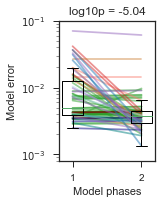

In [26]:
#plot model errors

plt.figure(figsize=(2.5,3))
for i in range(len(dfall)):
    tdf=dfall.iloc[i]
    plt.semilogy([1,2],[tdf['RMS1'],tdf['RMS2']],color=tdf['color'],alpha=0.5)
plt.boxplot([dfall['RMS1'],dfall['RMS2']],widths=0.3)
plt.ylabel('Model error')
plt.xticks([1,2],['1','2'])
plt.xlabel('Model phases')
    
u,p = st.mannwhitneyu(dfall['RMS1'],dfall['RMS2'])
plt.title(r'log10p = ' + str(np.round(np.log10(p),2)))
plt.ylim([8e-4,1e-1])
plt.xlim([0.8,2.2])

plt.tight_layout()
plt.savefig('figures/RMScomp.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2058: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2065: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2073: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2074: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4975: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternati

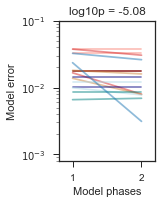

In [27]:
#plot model errors

plt.figure(figsize=(2.5,3))
for i in range(len(dfall)):
    tdf=dfall.iloc[i]
    plt.semilogy([1,2],[tdf['RMS1r'],tdf['RMS2r']],color=tdf['color'],alpha=0.5)
plt.boxplot([dfall['RMS1r'],dfall['RMS2r']],widths=0.3)
plt.ylabel('Model error')
plt.xticks([1,2],['1','2'])
plt.xlabel('Model phases')
    
u,p = st.mannwhitneyu(dfall['RMS1r'],dfall['RMS2r'])
plt.title(r'log10p = ' + str(np.round(np.log10(p),2)))
plt.ylim([8e-4,1e-1])
plt.xlim([0.8,2.2])

plt.tight_layout()
plt.savefig('figures/RMScompr.pdf',dpi=600)


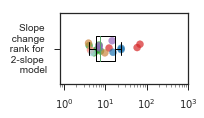

In [28]:
#plot model change points

cpdf = dfall[2*dfall['RMS2']<dfall['RMS1']] #no need to look at change points for models with RMS1~RMS2

gmean = np.exp(np.mean(np.log(cpdf['cp'])))

gstd = np.exp(np.std(np.log(cpdf['cp'])))

jit=0.1
plt.figure(figsize=(3,1.8))
plt.scatter(cpdf['cp'],np.random.normal(0,jit,len(cpdf)),alpha=0.7,color=cpdf['color'],s=50)
plt.boxplot(cpdf['cp'],positions=[0],widths=0.7,vert=False)
#plt.plot(0,np.median(df['cp'][df['cp']>2]),marker='D',color='k')
#plt.plot([0,0],[1,gmean+gstd],color='k',ls='-')
#plt.plot(0,gmean,marker='D',color='k')
#plt.title('n='+str(len(cpdf)),fontsize=10)

plt.semilogx()
plt.yticks([0],['Slope \n change \n rank for \n 2-slope \n model'])#,rotation=90)

plt.xlim([0.8,1e3])
plt.ylim([-1,1])
plt.tight_layout()
plt.savefig('figures/changepoint.pdf',dpi=600)


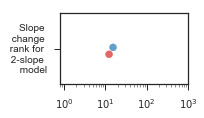

In [29]:
#plot model change points

cpdf = dfall[2*dfall['RMS2r']<dfall['RMS1r']] #no need to look at change points for models with RMS1~RMS2

gmean = np.exp(np.mean(np.log(cpdf['cp'])))

gstd = np.exp(np.std(np.log(cpdf['cp'])))

jit=0.1
plt.figure(figsize=(3,1.8))
plt.scatter(cpdf['cp'],np.random.normal(0,jit,len(cpdf)),alpha=0.7,color=cpdf['color'],s=50)
#plt.boxplot(cpdf['cp'],positions=[0],widths=0.7,vert=False)
#plt.plot(0,np.median(df['cp'][df['cp']>2]),marker='D',color='k')
#plt.plot([0,0],[1,gmean+gstd],color='k',ls='-')
#plt.plot(0,gmean,marker='D',color='k')
#plt.title('n='+str(len(cpdf)),fontsize=10)

plt.semilogx()
plt.yticks([0],['Slope \n change \n rank for \n 2-slope \n model'])#,rotation=90)

plt.xlim([0.8,1e3])
plt.ylim([-1,1])
plt.tight_layout()
plt.savefig('figures/changepointr.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4975: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


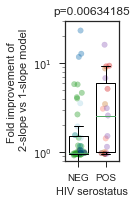

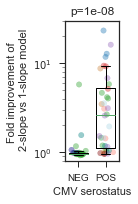

In [30]:
#check if by ecology HIV and/or CMV have more double pwl

for v in ['HIV','CMV']:
    jit=0.1
    df1=dfall[dfall[v+'status']==0]
    df2=dfall[dfall[v+'status']==1]
    r1=df1['RMS1']/df1['RMS2']
    r2=df2['RMS1']/df2['RMS2']

    plt.figure(figsize=(2,3))
    plt.scatter(np.random.normal(0,jit,len(r1)),r1,alpha=0.4,color=df1['color'],s=30)
    plt.scatter(np.random.normal(1,jit,len(r2)),r2,alpha=0.4,color=df2['color'],s=30)
    plt.boxplot([r1,r2],positions=[0,1],widths=0.7)
    #plt.plot(0,np.median(r1),marker='D',color='k')
    #plt.semilogy(1,np.median(r2),marker='D',color='k')
    plt.title('p='+str(np.round(st.mannwhitneyu(r1,r2)[1],8)))
    plt.ylabel('Fold improvement of \n 2-slope vs 1-slope model')
    plt.xticks([0,1],['NEG','POS'])
    plt.xlabel(v+' serostatus')
    plt.semilogy()
    plt.ylim(0.8,30)

    plt.tight_layout()
    plt.savefig('figures/ecol_'+v+'1v2.pdf',dpi=600)


In [32]:
dfall.columns

Index(['Unnamed: 0', 'pid', 'Age', 'Male', 'CMVstatus', 'mo_post_ART',
       'study_months', 'CD4', 'Nadir CD4', 'mo_pre_ART', 'race', 'cohort',
       'cohort_num', 'HIVstatus', 'initial_N', 'resample_size_TCR',
       'resample_size_HIV', 'color', 'nonsingleton_R', 'R', 'D1', 'D2', 'cmax',
       'c10', 'cfrac', 'RH', 'D1H', 'D2H', 'cmaxH', 'c10H', 'cfracH', 'RMS1',
       'al', 'RMS2', 'alpha1', 'alpha2', 'phi', 'cp', 'nonsingleton_Rr', 'Rr',
       'D1r', 'D2r', 'cmaxr', 'c10r', 'cfracr', 'RHr', 'D1Hr', 'D2Hr',
       'cmaxHr', 'c10Hr', 'cfracHr', 'RMS1r', 'alr', 'RMS2r', 'alpha1r',
       'alpha2r', 'phir', 'NHIV', 'nonsingleton_RHIV', 'RHIV', 'D1HIV',
       'D2HIV', 'cmaxHIV', 'c10HIV', 'cfracHIV', 'RMS1HIV', 'alHIV', 'RMS2HIV',
       'alpha1HIV', 'alpha2HIV', 'phiHIV', 'alHIVsample', 'alpha1corr'],
      dtype='object')

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4975: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


4.2279464346756356e-07 0.4015849007456205 2.188224306655065e-07


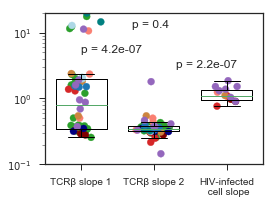

In [54]:
# compare power law exponents including longitudinal HIVneg cohort

#corrected based on pseudo AIC, RMS2 needs to be much less than RMS1
corral=[] 
for i in range(len(dfall)):
    tdf=dfall.iloc[i]
    if tdf['RMS2']<tdf['RMS1']:
        corral.append(tdf['alpha1'])
    else:
        corral.append(tdf['alpha2'])
dfall['alpha1corr']=corral


plt.figure(figsize=(4,3))

tdf1=dfall[['alpha1corr','color']].dropna()
tdf2=dfall[['alpha2','color']].dropna()
#tdfH=dfall[['alpha_HIV','color']].dropna()
tdfH=dfall[['alHIVsample','color']].dropna()

y1=tdf1['alpha1corr']
y2=tdf2['alpha2']
yH=tdfH['alHIVsample'].values
#yH=tdfH['alpha_HIV'].values

plt.boxplot([y1,y2],positions=[0,1],widths=0.7)
plt.boxplot(yH,positions=[2],widths=0.7)#,color='white')
plt.scatter(np.random.normal(0,0.1,len(tdf1)),y1,c=tdf1['color'])
plt.scatter(np.random.normal(1,0.1,len(tdf2)),y2,c=tdf2['color'])
plt.scatter(np.random.normal(2,0.1,len(tdfH)),yH,c=tdfH['color'])
plt.semilogy()

u,p12 = st.mannwhitneyu(y1,y2)
u,p1H = st.mannwhitneyu(y1,yH)
u,p2H = st.mannwhitneyu(y2,yH)

plt.annotate('p = ' + str(np.round((p12),8)),[0.,5])
plt.annotate('p = ' + str(np.round((p1H),2)),[0.7,12])
plt.annotate('p = ' + str(np.round((p2H),8)),[1.3,3])

print(p12,p1H,p2H)
plt.ylim([0.1,20])
plt.xlim([-0.5,2.5])
plt.xticks(np.arange(3),['TCRβ slope 1','TCRβ slope 2','HIV-infected\n cell slope'])
plt.tight_layout()
plt.savefig('figures/ecol_alphas.pdf',dpi=600)


/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4975: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


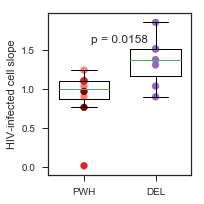

In [51]:
#comparison of HIV clonality for PWH and DEL

plt.figure(figsize=(3,3))

df1=dfall[(dfall['cohort_num'] == 1)] #just PWH
df3=dfall[(dfall['cohort_num'] == 3)] #just DEL

alPWH=list(df1['alHIVsample'].dropna())
alDEL=list(df3['alHIVsample'].dropna())
           
plt.scatter(np.ones(len(df1)),df1['alHIVsample'],c=df1['color'])
plt.scatter(np.ones(len(df3))+1,df3['alHIVsample'],c=df3['color'])
plt.boxplot([alPWH,alDEL],widths=0.7)

u,p=st.mannwhitneyu(alPWH,alDEL)
plt.annotate('p = ' + str(np.round((p),4)),[1.1,1.6])

plt.xticks(np.arange(2)+1,['PWH','DEL'])
plt.ylabel('HIV-infected cell slope')

plt.tight_layout()
plt.savefig('figures/ecol_PWHvsDEL-HIValpha.pdf',dpi=600)
